In [64]:
from glob import glob
from time import time
import numpy as np
from imageio import imread
from scipy import ndimage
from skimage import filters, measure, feature
import matplotlib.pyplot as plt
from skimage import filters

In [4]:
n_lenna = imread('noisyLenna.png')
vec = np.array([[-1, -1], [-1, 0], [0, -1], [0, 0], [-1, 1], [1, -1], [0, 1], [1, 0], [1, 1]])

def denoise(img):
    denoise_lenna = img * 0
    for (x,y), value in np.ndenumerate(img):
        #print x, y
        sum = 0
        count = 0
        for v in vec:
            coords = np.array([x, y])
            if np.all((coords + v) >= 0) & np.all((coords + v) < img.shape):
                sum += img[x + v[0], y + v[1]]
                count += 1
        denoise_lenna[x, y] = int(sum/count)
    return denoise_lenna

def scipy_denoise(img):
    size = 9
    kernel = np.full((size,size), 1.0/(size*size))
    return ndimage.convolve(img, kernel, mode='mirror')

start = time()
lenna_d = denoise(n_lenna)
end = time()
print("Manuelles denoisen dauerte", end-start, "Sekunden")

start = time()
lenna_ds = scipy_denoise(n_lenna)
end = time()
print("Scipy denoisen dauerte", end-start, "Sekunden")

Manuelles denoisen dauerte 38.93686485290527 Sekunden
Scipy denoisen dauerte 0.03414177894592285 Sekunden


In [57]:
import numpy
import scipy
from scipy import ndimage
def sobel_filter(im):
    dx = filters.sobel_h(im)  # horizontal derivative
    dy = filters.sobel_v(im)  # vertical derivative
    d  = filters.sobel(im)
    return dx,dy,d
#https://stackoverflow.com/questions/7185655/applying-the-sobel-filter-using-scipy
# Alternative http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.sobel
lenna_sobel_x,lenna_sobel_y,lenna_sobel = sobel_filter(n_lenna)

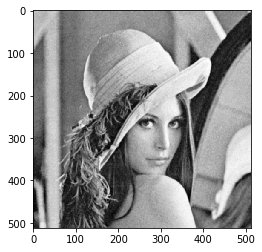

In [17]:
plt.imshow(lenna_d,cmap="Greys_r")

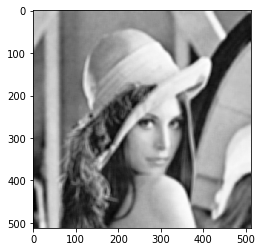

In [18]:
plt.imshow(lenna_ds,cmap="Greys_r")

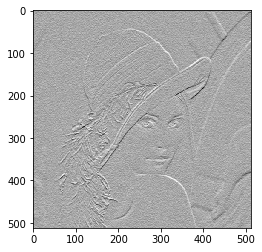

In [62]:
plt.imshow(lenna_sobel_x,cmap="Greys_r")

In [63]:
gauss = filters.gaussian(n_lenna, 5)

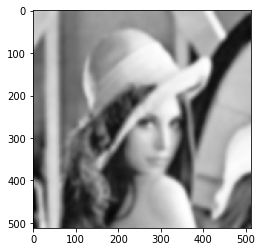

In [50]:
plt.imshow(gauss,cmap="Greys_r")

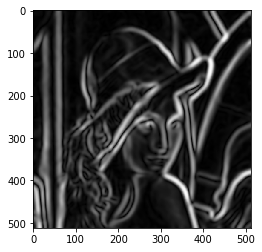

In [53]:
plt.imshow(filters.sobel(gauss),cmap="Greys_r")

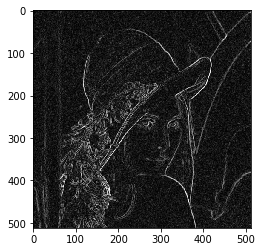

In [65]:
plt.imshow(filters.sobel(n_lenna),cmap="Greys_r")

In [66]:
# Aufgabe 5:
eye = imread('auge.png')

def match(img, template):
    percentMatch = feature.match_template(img, template)
    highestMatch = np.argmax(percentMatch)
    argmaxCoords = np.unravel_index(highestMatch, percentMatch.shape)
    print(argmaxCoords, percentMatch.shape
    plt.plot(argmaxCoords[1], argmaxCoords[0], 'bo')
    plt.imshow(img)

#match(lenna, eye)

whereis = misc.imread('whereIsWally1.jpg')
wally = misc.imread('wally.png')
#plt.imshow(whereis)
match(whereis, wally)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int argmaxCoords, percentMatch.shape)? (<ipython-input-66-9f9cf492aea4>, line 8)